In [2]:
import sys
from pathlib import Path
sys.path.append("../lib")
path_to_data=Path("../data/")
from input_output_func import write_to_file

### Алгоритм Флойда-Уоршалла
Для начала рассмотрим алгоритм Флойда (Флойда-Уоршалла). Его отличительной особенностью является то, что он умеет находить кратчайшие расстояния между всеми парами вершин. Но за это приходится платить временем работы, О(N^3). Идея заключается в следующем: мы будем перебирать все возможные тройки вершин (i, j, k) и пытаться улучшить путь из i в j, проходя через k.

     #Считываем граф, преобразуем его в матрицу смежности, которую храним в d
     #Отсутствие ребра помечаем каким-нибудь заведомо большим числом
    # Считаем, что n - кол-во вершин, вершины #пронумерованы от 0
    for k in range(n):
        for i in range(n):
            for j in range(n):
                d[i][j] = min(d[i][j], d[i][k]+d[k][j])

#### Упражнение №1
Вам дано число N, далее N строк по N чисел - матрица смежности взвешенного графа,
отсутствие ребра помечено как 0. На следующих двух строках даны 2 списка: с начальными вершинами и с целевыми вершинами. Вам необходимо распечатать таблицу кратчайших расстояний, где строки - список начальных вершин, а столбцы - список целевых вершин.


In [3]:
text="""5
0 -10 10 5 10
20 2 10 13.4 0
4.1 2.3 0 0 0
0 0 0 5 3.1
0 0 0 0 0 
0 3 4
4 2 3 1"""
path=path_to_data.joinpath("graph/wgr/floyd.txt")
write_to_file(text,path)

file floyd.txt is written


In [5]:
import pandas as pd
def read_adj_matrix(read_line):
    n=int(read_line())
    F=[[None for j in range(n)] for i in range(n)]
    for i in range(n):
        string=read_line().split()
        for j in range(n):
            F[i][j]=float(string[j] if string[j]!='0' else "inf")      
    return F

def floyd_algo(F):
    n=len(F)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                F[i][j] = min(F[i][j], F[i][k]+F[k][j])
                
def get_table_min_distances(read_line):
    F=read_adj_matrix(read_line)
    start_vertexes=list(map(int,read_line().split()))
    end_vertexes=list(map(int,read_line().split()))
    floyd_algo(F)
    data=[[F[i][j] if F[i][j]!=float("inf") else None for j in end_vertexes]
          for i in start_vertexes]
    return pd.DataFrame(data,index=start_vertexes, columns=end_vertexes)

with path.open('r') as file:
    display(get_table_min_distances(file.readline))

,4,2,3,1
0,6.5,0.0,3.4,-10.0
3,3.1,NaN,5.0,NaN
4,NaN,NaN,NaN,NaN


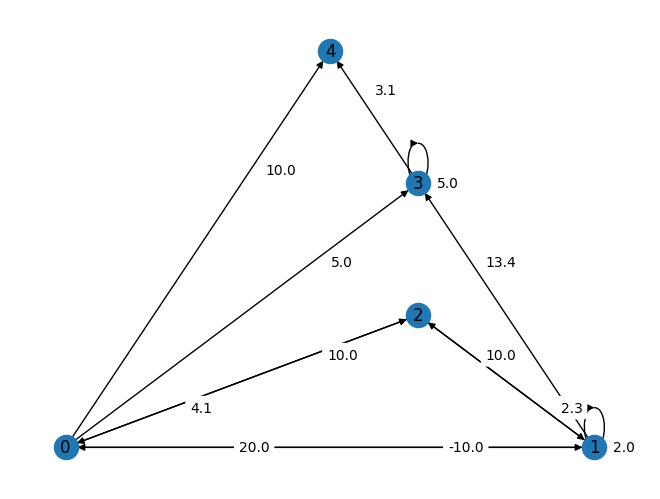

In [6]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
#G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
text1=text.split("\n")[1:6]
adj_matrix=list(map(lambda s: list(map(float,s.split())),text1))
G=nx.DiGraph(np.array(adj_matrix))
layout = nx.planar_layout(G)
left_layout={i:(xy[0]+0.1,xy[1]) for i,xy in layout.items()}
nx.draw(G, layout,with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=left_layout,label_pos=0.3,edge_labels=labels,
                             rotate= False,clip_on=False)
plt.show()

### Упражнение №2
Вам даны числа N и M, количество вершин и ребер ориентированного графа. Далее идет M строк вида u, v, w, где u и v задают начало и конец ребра, а w - его вес. В конце дано число - стартовая вершина. Посчитайте кратчайшие расстояния до всех вершин, используя алгоритм Дейкстры за O(N^2).


In [7]:
def dijkstra_min(graph,s):
    d = [float("inf")]*n  # Считаем, что n - кол-во вершин, вершины пронумерованы от 0
    d[s] = 0  # s - стартовая вершина
    used = [False]*n
    while True:
        u = -1
        #выбираем наименьшую среди посещенных
        for i in range(n):
            if not used[i] and (u == -1 or d[u] > d[i]):
                u = i
        #если все вершины посещены стоп
        if u == -1:
            break
        #помечаем посещенную
        used[u] = True
        # улучшаем расстояния для соседей
        for v, w in graph[u]:
            d[v] = min(d[v], d[u] + w)

In [8]:
from collections import deque

def dijkstra(graph,start):
    queue=deque([start])
    s={start:0}
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if u not in s or s[v]+graph[v][u]<s[u]:
                assert graph[v][u]>=0,"weights in graph must be >=0"
                s[u]=s[v]+graph[v][u]
                queue.append(u)
    return s

def find_min_path(graph,start,end,s,acc=3):
    """Not digraphs! you need parents if digraph"""
    v=end
    path=[]
    is_path=True
    while is_path and v!=start:
        is_path=False
        for u in graph[v]:
            if round(s[v],acc)==round(graph[v][u]+s[u],acc):
                path.append((u,v,graph[v][u]))
                v=u
                is_path=True
                break
    return path[::-1] if is_path else False

In [14]:
from pathlib import Path
from input_output_func import write_to_file
text="""8 10
7 3 0.1
3 1 3
5 2 5.3
6 4 1.
6 7 2.
4 7 0.7
1 6 3.8
1 2 2.1
6 5 2.1
6 2 10"""
path=path_to_data.joinpath("graph/wgr/dijkstra.txt")
write_to_file(text,path)

file dijkstra.txt exists


In [15]:
from get_graph import get_weighted_digraph
with path.open('r') as file:
    graph=get_weighted_digraph(file.readline)

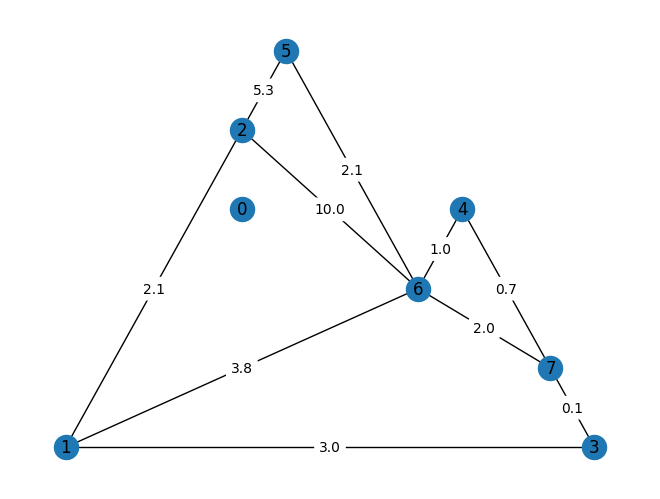

In [19]:
graph1={v:{u:{'weight':graph[v][u]} for u in graph[v]} for v in graph}
G=nx.Graph(graph1)
layout = nx.planar_layout(G)
nx.draw(G, layout,with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=layout,label_pos=0.5,edge_labels=labels,
                             rotate= False,clip_on=False)
plt.show()

In [20]:
start=6
s=dijkstra(graph,start)
s

{6: 0, 4: 1.0, 7: 1.7, 5: 2.1, 2: 6.9, 3: 1.8, 1: 4.8}

In [21]:
end=3
find_min_path(graph,start,end,s,acc=10)

False

### Упражнение №3
Теперь решите задачу из упражнения №2, реализовав алгоритм Дейкстры за O((N+M) log N).
Когда-нибудь обязательно)

In [22]:
import heapq
def dijkstra_priority_queue(graph,start,n):
    distances=[0 if start==i else None for i in range(n)]
    queue=[(0,start)]
    while queue:
        cur_d,v=hp.heappop(queue)
        if cur_d>distances[v]: continue
        for u in graph[v]:
            if  (distances[u] is None or
                distances[v]+graph[v][u]<distances[u]):
                distances[u]=distances[v]+graph[v][u]
                hp.heappush(queue,(distances[u],u))
    return distances

### Алгоритм Форда-Беллмана
Алгоритм Форда-Беллмана будет последним рассмотренным алгоритмом, который, как и алгоритм Дейкстры, используется для поиска кратчайшего расстояния от одной вершины до остальных. Он является типичным алгоритмом ДП. Состояния описываются двумя параметрами и означают "длину кратчайшего пути, проходящего не более, чем по i ребрам, и заканчивающегося в вершине j".

    # считываем граф, преобразуем его в список ребер, который храним в edges
    d = [None]*n  # Считаем, что n - кол-во вершин, вершины пронумерованы от 0
    d[s] = 0  # s - стартовая вершина
    # INF - заведомо большое число
    for i in range(n-1):
        for u, v, w in edges:
            if d[u] is not None:
                d[v] = min(INF if d[v] is None else d[v], d[u] + w)
                
Такой алгоритм работает $O(N*M)$. Заметим несколько вещей:

Алгоритм работает корректно даже при наличии ребер отрицательного веса, -1 - валидное значение для расстояний, поэтому массив инициализировался с None;
Вернувшись в вершину, пройдя по циклу, расстояние до нее не может уменьшится (циклы отрицательного веса пока не рассматриваем);
Исходя из (2) для нахождения кратчайшего пути до всех вершин достаточно N-1 итерации, т.е. кратчайшие пути до всех вершин не содержат циклов.
Однако утверждение (2) справедливо, только когда нет циклов отрицательного веса, т.е. цикла, в которой растояния до вершин в нем будут каждый раз уменьшаться, если мы будем по нему гулять. Таким образом нам вообще не выгодно его заканчивать, а значит мы можем счиать, что кратчайшие расстояния до этих вершин будут -∞. Таким образом N-1 итерации не хватит чтобы посчитать кратчайшие расстояния. Поэтому мы можем внешний цикл увеличить на одну итерацию. Все вершины, расстояние до которых обновится на последней итерации, можем считать имеют расстояние -∞.

Отсюда можно сделать вывод, что алгоритм применяется не только для поиска кратчайших расстояний в графе, но и для поиска циклов отрицательного веса. Кроме того, алгоритм используется для поиска максимального потока минимальной стоимости.


#### Упражнение №4
Решите задачу из упражнения №2, используя алгоритм Форда-Беллмана. Гарантируется, что циклов отрицательного веса в графе нет.

In [23]:
def ford(edges,start,n,parents=None):
    inf=float("inf")
    s=[0 if i==start else None for i in range(n)]
    for i in range(n-1):
        for v,u,w in edges:
            if not s[v] is None:
                s[u]=min(inf if s[u] is None else s[u],s[v]+w)
                if not parents is None:
                    parents[u]=v
    return s
                
def get_edges(read_line,n=None,m=None,is_directed=True):
    if n is None or m is None:
        n,m=map(int,read_line().split())
    edges=[None for i in range(m)]
    for i in range(m):
        v,u,w=read_line().split()
        v,u=map(int,(v,u))
        w=float(w)
        edges[i]=(v,u,w)
        if not is_directed:
            edges.append(u,v,w)
    return n,edges

#def read_line(text):
#    for string in text.split("\n"):
#        yield string

In [24]:
#примеры перезаписаны под 5 ю задачу с отрицательными циклами
import io
text="""10 14
7 3 0.1
3 1 3
5 2 5.3
6 4 1.
6 7 2.
4 7 0.7
1 6 3.8
1 2 2.1
6 5 2.1
6 2 10
0 8 2
8 2 1
8 9 -5
9 0 2"""
text1="""9 12
7 3 0.1
3 1 2
5 2 -5.3
6 4 1.
6 7 -2.
4 7 0.7
1 6 -3.8
1 2 2.1
6 5 2.1
6 2 10
7 8 2
8 7 1"""

In [25]:
text_buf=io.StringIO(text1)
n,edges=get_edges(text_buf.readline)
start=6
for vertex,distance in enumerate(ford(edges,start,n)):
    print(vertex,distance if distance is None else "{:.2f}".format(distance))

0 None
1 -11.00
2 -14.30
3 -13.00
4 -10.10
5 -12.70
6 -14.80
7 -13.10
8 -11.10


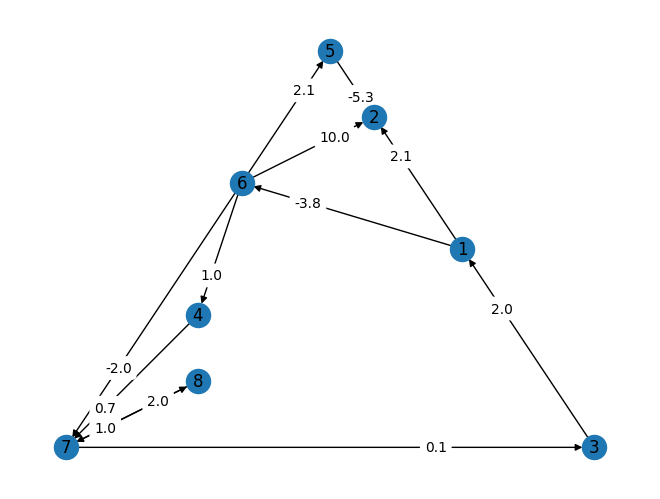

In [26]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
G=nx.DiGraph()
G.add_weighted_edges_from(edges)
layout = nx.planar_layout(G)
nx.draw(G, layout,with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=layout,label_pos=0.3,edge_labels=labels,
                             rotate= False,clip_on=False)
plt.show()

#### Упражнение №5
Как и в предыдущих задачах, нам задан ориентированный взвешенный граф. Но теперь в нем могут быть циклы отрицательного веса. Необходимо вывести любой из таких циклов, либо сказать, что в графе его нет.\
Итак после 100500 проб и ошибок взяла алгоритм с http://e-maxx.ru/algo/negative_cycle
и несколько улучшила \
**Замечание.** 
* Во-первых во время одного прохода обновляются не все вершины в отрицательном цикле, поскольку это зависит от порядка прохода ребер. Вариант - сделать 2 прохода?\
* Во-вторых поскольку алгоритм флойда ищет расстояния для 1ой определенной вершины, то в итоге расстояния будут посчитаны для 1ой компоненты связности.\
Итак. алгоритм нахождения отриц цикла во всем графе

      В цикле пока ребра не закончатся:
        Выбирается произвольная стартовая вершина,
        из вершин являющимися началом ребер
        Считаем расстояния до нее
        делаем еще 2 прохода по подсчету расстояний по ребрам,
            если расстояние  изменилось -
                записываем предка вершины
                конечная вершина=вершина
            если первый проход:
                добавляем все несвязные с подграфом ребра в отдельный список
        если существует конечная вершина -break
        ребра= новые ребра

Таким образом можно пройти по всем КС и в каждой компоненте отметить те вершины, расстояние до которых изменилось

Далее восстановление цикла: \
отматываем от конечной вершины n parents \
Наша полученная вершина теперь точно в цикле \
от полученной вершины ищем цикл проходя по parents пока не получим ее же \

- Тут никак не определяется это положительный или отрицательный цикл по-хорошему это надо проверять например,если положительный цикл получается внутри отрицательного то можно на него попасть\
можно например сохранять для parents еще и веса, либо преобразовать edges в словарь\
и при проходе проверять суммарный вес полученного цикла, если он отрицательный- то ок, иначе ищем дальше
- Сравнение float весов в принципе вещь такая, могут и ошибки возникать при маленьких весах
   а ошибка-то копится будет, короче ограничения на точность веса ставить или с округлением сравнивать)
 - Че еще можно придумать - количество проходов для проверки, мм совсем не очевидная вещь
 - Может сразу в расстояния -inf записывать при проверке?
 - нужно ли parents считать сразу в алгоритме(ну я в итоге туда и засунула)\
Короче мне поднадоело этим заниматься просто))

In [27]:
def find_negative_cycle(edges,start,n):
    inf=float("inf")
    parents=[None for i in range(n)]
    end=None
    while len(edges)>0:
        start=edges[0][0]
        s=ford(edges,start,n,parents)
        new_edges=[]
        for k in range(2):
            for edge in edges:
                v,u,w=edge
                if not s[v] is None:
                    assert not s[u] is None,"weight must be calced on this step"
                    if s[u]>s[v]+w:
                        s[u]=s[v]+w
                        parents[u]=v
                        end=u
                elif k==1:
                    new_edges.append(edge)
        if not end is None: break
        edges=new_edges[:]
    if end is None: return 0
    return get_cycle(parents,end,n)

def get_cycle(parents,end,n):
    for i in range(n):
        end=parents[end]
    start=parents[end]
    cycle=[end]
    while start!=end:
        cycle.append(start)
        start=parents[start]
    return cycle[::-1]

In [28]:
find_negative_cycle(edges,start,n)

[3, 1, 6, 7]